In [1]:
## import necessary packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # to create kmeans model

## load dataset
data = pd.read_csv(r"C:\Users\o\Downloads\training.csv")
data

,animal,a1,a2,a3,a4,a5,a6
0,d1,1,0,0,0,0,0
1,d2,1,0,0,1,0,0
2,d3,1,0,0,0,1,0
3,d4,0,0,1,1,0,1
4,d5,0,0,1,1,0,1
5,d6,0,0,1,0,0,1
6,d7,0,1,0,0,0,1
7,d8,0,1,0,0,0,1
8,d9,0,1,0,0,1,1
9,d10,1,0,0,0,0,0


In [3]:
# remove the animal column/labels
data_new = data.iloc[:, 1:7]
data_new


,a1,a2,a3,a4,a5,a6
0,1,0,0,0,0,0
1,1,0,0,1,0,0
2,1,0,0,0,1,0
3,0,0,1,1,0,1
4,0,0,1,1,0,1
5,0,0,1,0,0,1
6,0,1,0,0,0,1
7,0,1,0,0,0,1
8,0,1,0,0,1,1
9,1,0,0,0,0,0


c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """
c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """


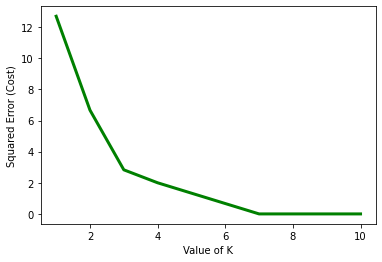

In [5]:
## lets find the most optimal value for k
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data_new)
    # calculates squared error for the clustered points
    cost.append(KM.inertia_)

# lets plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() 

In [7]:
# Declaring Model
kmodel = KMeans(n_clusters=3, init = 'k-means++', n_init=10, random_state=0)

# Fitting KMeans Model
kmodel.fit(data_new.values)

# Prediction on the entire training data
data_pred = kmodel.predict(data_new.values)

# Printing Predictions
print(data_pred)


[2 2 2 0 0 0 1 1 1 2]


In [9]:
# trying to Predicit a single input 
group_predicted = kmodel.predict([[1, 0 ,  0 ,  0  , 0  , 0]])
group_predicted

array([2])

In [10]:
## find the  connection weights of each output unit in each group
kmodel.cluster_centers_

array([[0.00000000e+00, 5.55111512e-17, 1.00000000e+00, 6.66666667e-01,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.55111512e-17, 5.55111512e-17,
        3.33333333e-01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        2.50000000e-01, 0.00000000e+00]])

In [11]:
## Evaluate the algorithm
pd.crosstab(data_pred, kmodel.labels_)

## my model has correctly grouped all data points into 3 groups

col_0,0,1,2
row_0,,,
0,3,0,0
1,0,3,0
2,0,0,4


In [12]:
## Lest now move to testing data

data_test = pd.read_csv(r"C:\Users\o\Downloads\testing.csv")

data_test

# remove the animal column/labels
data_test_new = data_test.iloc[:, 1:7]

data_test_new

,a1,a2,a3,a4,a5,a6
0,0,0,1,1,1,1
1,1,0,0,0,1,1
2,0,1,0,1,0,1


In [14]:
# lest precist the entire testing data
data_pred = kmodel.predict(data_test_new.values)

# Printing Predictions
print(data_pred)

[0 2 1]
